In [31]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
# Importing prepared dataset
import pickle
input = open('merc2.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

f = ['model', 'year', 'type', 'distance', 'fuel', 'tax',
       'miles per galoon']

In [33]:
# Metrics
def metrics(X_train, X_test, y_train, y_test, y_pred, model):
    RMSE = [mean_squared_error(y_train, model.predict(X_train),squared=False), mean_squared_error(y_test, y_pred, squared=False)]
    R2 = [model.score(X_train, y_train), model.score(X_test, y_test)]
    results = {'RMSE': RMSE, 'R2':R2}
    return pd.DataFrame(results, index=['Train', 'Test'])

# Tree

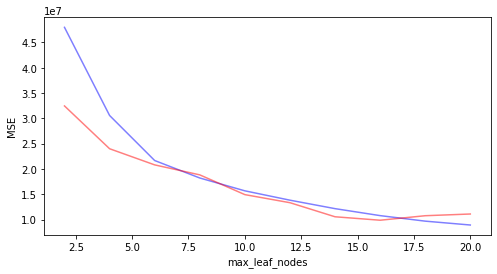

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        dt = DecisionTreeRegressor(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, dt.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, dt.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")
    
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train[f], X_test[f], y_train, y_test, [2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

In [37]:
# Fitting Tree to the Training set
dt = DecisionTreeRegressor(max_leaf_nodes = 16).fit(X_train[f], y_train)

# Predicting the Test set results
dt_y_pred = dt.predict(X_test[f])

# Metrics
metrics(X_train[f], X_test[f], y_train, y_test, dt_y_pred, dt).round(2)

,RMSE,R2
Train,3286.05,0.84
Test,3144.76,0.79


Коэффициент корреляции лучше для значений Train

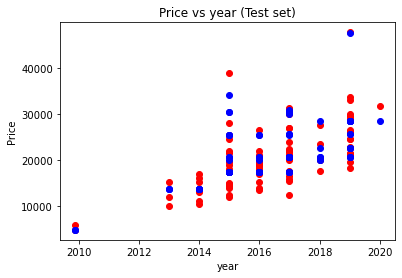

In [38]:
# Visualising the Test set results
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], dt.predict(X_test[f]), 'bo')
plt.title('Price vs year (Test set)')
plt.xlabel('year')
plt.ylabel('Price')
plt.show()

Text(0.5, 1.0, 'Tree. Feature Importance')

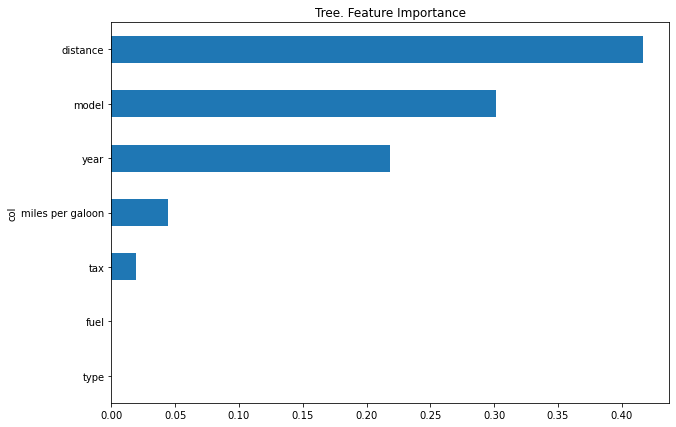

In [39]:
# Features importances
dt_imp = pd.DataFrame({'imp': dt.feature_importances_, 'col': X_train[f].columns})
dt_imp = dt_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-10:]
dt_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Tree. Feature Importance')

Наиболее важный фактор согласно графику Пробег

# Random forest

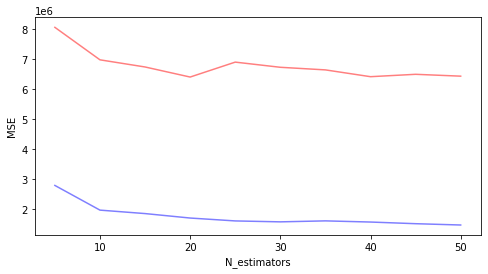

In [40]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")
    
# The optimal number of trees 
from sklearn.ensemble import RandomForestRegressor    
rf_best_n_estimator(X_train[f], X_test[f], y_train, y_test, [5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

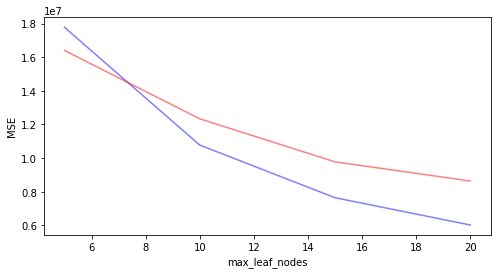

In [41]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=15, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")
    
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train[f], X_test[f], y_train, y_test, [5, 10, 15, 20])

In [42]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 15, max_leaf_nodes = 20, random_state = 10).fit(X_train[f], y_train)

# Predicting the Test set results
rf_y_pred = rf.predict(X_test[f])

# Metrics
metrics(X_train[f], X_test[f], y_train, y_test, rf_y_pred, rf).round(2)

,RMSE,R2
Train,2454.39,0.91
Test,2939.19,0.82


R2 увеличился

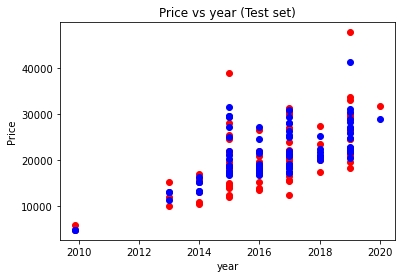

In [43]:
# Visualising the Test set results
plt.scatter(X_test['year'], y_test, color = 'red')
plt.plot(X_test['year'], rf.predict(X_test[f]), 'bo')
plt.title('Price vs year (Test set)')
plt.xlabel('year')
plt.ylabel('Price')
plt.show()

Text(0.5, 1.0, 'Random Forest. Feature Importance')

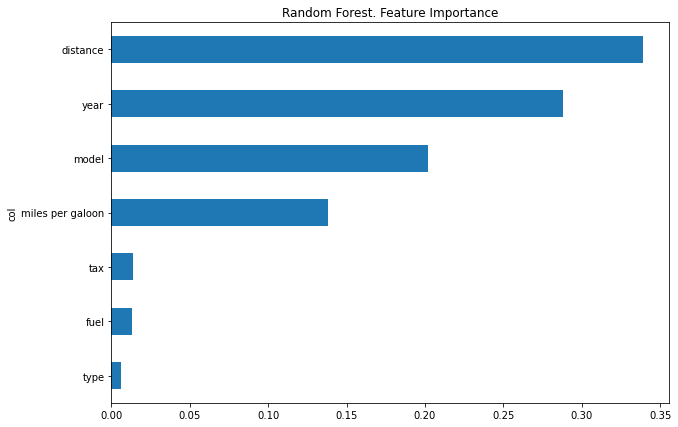

In [44]:
# Features importances
rf_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': X_train[f].columns})
rf_imp = rf_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-20:]
rf_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Random Forest. Feature Importance')

Самый значимый фактор Пробег

In [45]:
#catboost
#! pip install catboost

In [46]:
def catboost_best_iterations(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostRegressor(iterations=i,random_state=10,eval_metric='RMSE',loss_function='RMSE').fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel('"MSE')
    ax.set_xlabel('Iterations')
    ax.legend(framealpha=1, frameon=True);
    
from catboost import CatBoostRegressor
catboost_best_iterations(X_train[f], X_test[f], y_train, y_test, list(range(1,13)))

ModuleNotFoundError: No module named 'catboost'

Random forest - лучшая модель

In [47]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('merc3.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()